1. 2018-05-04 04:05:00: 上机处理齿轮箱出口压力高报警时发现油泵滤芯含有铁粉，经检查确认为齿轮箱二级小后轴承磨损，该机组在2017年4月22日因SKF轴承严重磨损已更换过齿轮箱，并要求新齿轮箱使用FAG轴承。截止5月4日现场已巡检齿轮箱67台，合计发现5台SKF轴承，因现场39台机组处于500h试运行考核期，现场计划在试运行结束后处理，目前临时措施更换油泵滤芯。
1. 2018-05-04 09:05:00: 查阅监控数据，发现故障发生时，齿轮箱入口油压力未0.3bar，出口油压力为14.8bar,上机组检查，上机组检查，滤芯含有大量杂质及少量铁粉，检查齿轮箱发现齿轮箱二级小后轴承磨损。更换滤芯后故障消除。
1. 2018-05-13 05:05:00: 机组报机舱加速度极限故障停机，上机组对加速度传感器及线路检查，无异常;检查齿轮箱,发现齿轮箱二级小后轴承轴承保持架损坏;检查齿轮箱弹性支撑，发现左右个一个弹性支承脚垫出现裂纹损坏。重齿厂家给出方案，先更换二级小后轴承，如不能更换，再进行下塔处理。

In [34]:
import os
import sys
sys.path.append("../../")
from imp import reload
from matplotlib import pyplot as plt

import Reader
import toolkit
import visualization
# import GearboxFaultDetector
import model_entry

In [11]:
reload(model_entry)

<module 'model_entry' from '../..\\model_entry.py'>

In [23]:
feature_path = r"D:/Workspace/python_workspace/gearbox-fault-detection/local/feature/san_tang_hu/"
speed_path = r"D:\Workspace\python_workspace\gearbox-fault-detection\local\rotating_speed\san_tang_hu"
wind_farm = "san tang hu"
wind_turbine = "33"
sensors = (
    "gearbox",
    "low_speed_shaft",
    "high_speed_shaft",
)

In [4]:
reader = Reader.Reader()
feature = reader.read_feature(os.path.join(feature_path, wind_turbine), sensors)
speed = reader.read_speed(os.path.join(speed_path, wind_turbine), sensors)

toolkit.print_shape(feature=feature)

feature.shape: (114, 75)


array([[<AxesSubplot:title={'center':'speed'}>]], dtype=object)

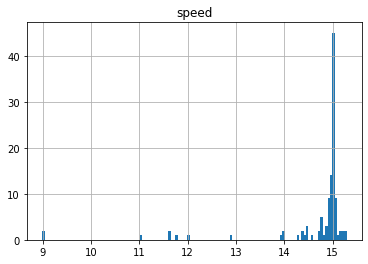

In [5]:
speed.hist(bins=128)

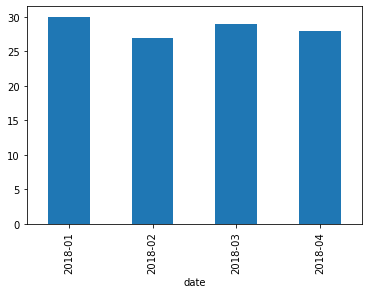

In [6]:
# feature = feature[speed.speed >= 1000]
# speed = speed[speed.speed >= 1000]

# toolkit.print_shape(feature=feature, speed=speed)

visualization.data_distribution(feature)

In [7]:
# 划分train set, test set
train_start = "2018-01"
train_end = "2018-03"

test_start = "2018-04"
test_end = "2018"

feature_train = feature[train_start: train_end]
# speed_train = speed[train_start: train_end]

feature_test = feature[test_start: test_end]
# speed_test = speed[test_start: test_end]

toolkit.print_shape(feature_train=feature_train, feature_test=feature_test)

feature_train.shape: (86, 75)
feature_test.shape: (28, 75)


In [16]:
feature_test = feature["2018-03": ]
# feature_test = feature
# speed_test = speed

In [9]:
detector = model_entry.OutlierDetector()

In [12]:
detector.fit(feature_train)

<AxesSubplot:xlabel='date'>

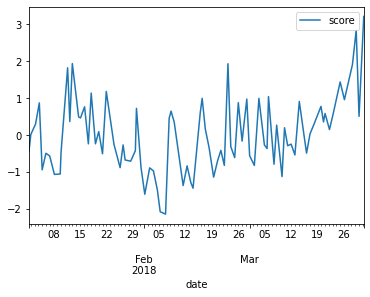

In [17]:
detector.decision_scores.plot()

In [18]:
anomaly_scores = detector.decision_function(feature_test)

<AxesSubplot:xlabel='date'>

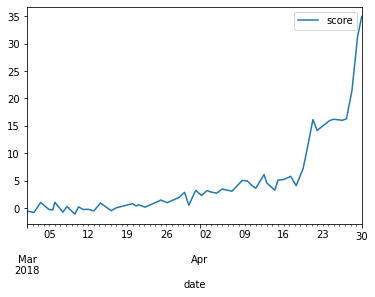

In [19]:
anomaly_scores.plot()

In [21]:
anomaly_scores_train = detector.decision_scores
label_train = detector.label
# 测试
anomaly_scores_test = detector.decision_function(feature_test)
label_test = detector.predict(feature_test)

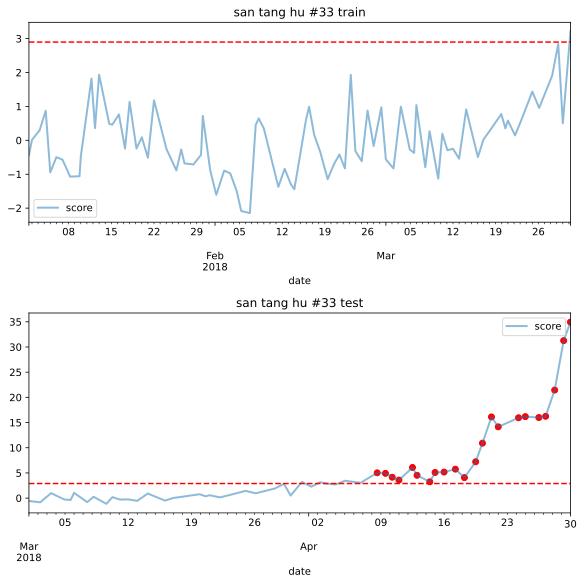

In [24]:
fig, ax = visualization.plot_line(anomaly_scores_train, label_train,
    anomaly_scores_test, label_test, detector.threshold, wind_farm, 
    wind_turbine)

In [40]:
visualization.set_figsize(figsize=(8, 6))

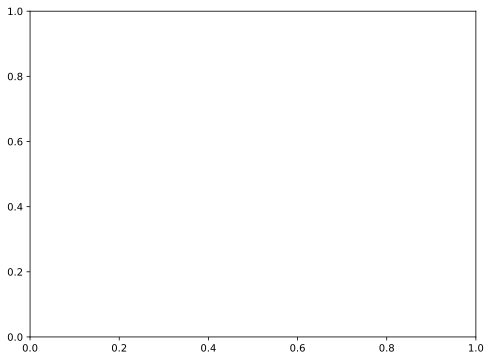

In [41]:
fig, ax = plt.subplots()

In [31]:
temp = ax[1]